In [6]:
import zipfile
import numpy as np
import cv2
 
faces = {}
with zipfile.ZipFile("../data/archive.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

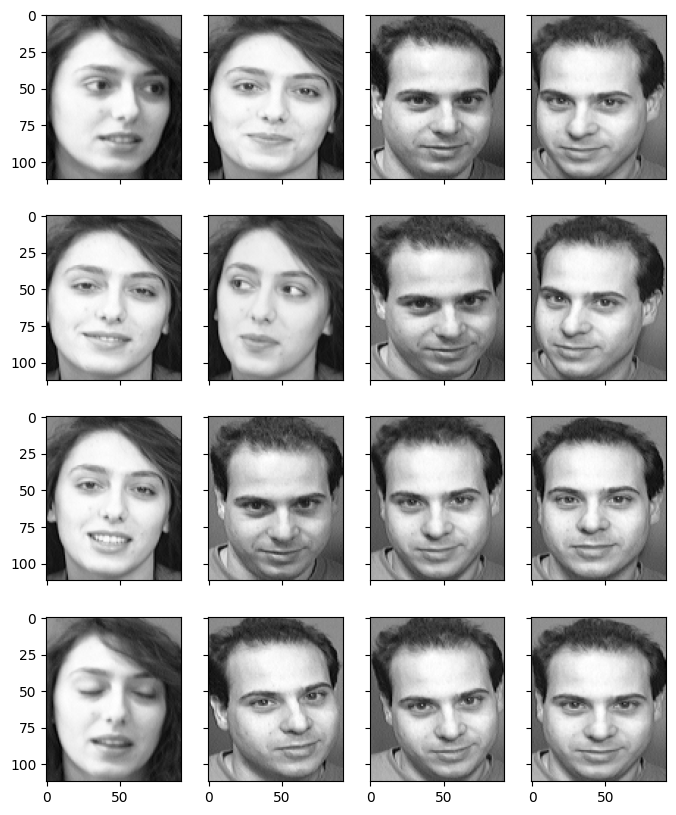

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [8]:
print(list(faces.values())[-1].shape)

(112, 92)


In [30]:
face_matrix = np.array([face.flatten() for face in faces.values()])
face_matrix

k = 16

# 1. Compute the mean face

mean_face = face_matrix.mean(axis=0)

# 2. centerilized

center_face_matrix = face_matrix - mean_face

# 3. SVD

_, S, V = np.linalg.svd(center_face_matrix)

In [31]:
# 4. get max k S

idx = np.argsort(S)[-1:-k-1:-1]

eigenfaces = V[idx]

eigenfaces

array([[ 2.12507923e-03,  2.11276614e-03,  2.14250419e-03, ...,
         7.04005567e-03,  6.39096175e-03,  7.34479428e-03],
       [ 1.46851506e-02,  1.46139383e-02,  1.46318643e-02, ...,
        -1.05610380e-02, -9.70069545e-03, -8.81892481e-03],
       [ 1.99294881e-02,  2.00092007e-02,  1.98385174e-02, ...,
         1.41636829e-02,  1.43943595e-02,  1.48748947e-02],
       ...,
       [ 4.79193409e-03,  5.42017005e-03,  4.58778518e-03, ...,
        -5.81825319e-03, -4.73245595e-03, -3.56610998e-03],
       [-8.33290043e-05, -5.40757913e-04,  8.72701084e-04, ...,
        -9.72888169e-03, -8.36066159e-03, -8.11819561e-03],
       [ 2.37928631e-04,  9.13846138e-04,  8.67979315e-05, ...,
         1.28976617e-02,  1.53116713e-02,  1.47167759e-02]])

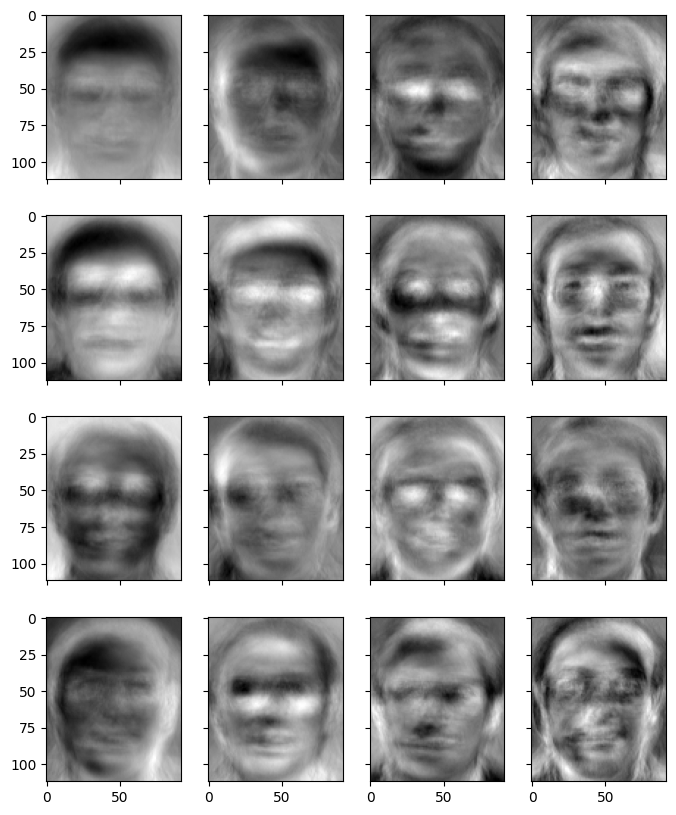

In [32]:
# Show the first 16 eigenfaces
faceshape = list(faces.values())[0].shape
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()